![](ITD.png)

<div style = " Text-align: center">
    
# Inteligencia Artificial

##  titanic(Arboles de Decision)

### Nombre Del Docente
## Rodriguez Rivas Jose Gabriel
### Nombre Del Alumno
## Edgar Miguel Soto Trujillo

</div>

### practica
En este  laboratorio devo  crear un clasificador de árbol de decisiones que funcione con un conjunto de datos que contenga los  detalles sobre los pasajeros que estaban a bordo del trasatlántico Titanic durante su trágico primer viaje cuantos fallecieron y cque tipo de pase tenenian.

### parte 1

In [2]:
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic-train.csv")

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


¿Faltan valores en el conjunto de datos?

**Respuesta:** Si hay valores nulos en el caso de la edad y la cabina.

### Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [5]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [6]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [7]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [8]:
training

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.000000,0,0,211535,13.0000,NaN,S
6,7,0,3,"Bowen, Mr. David John ""Dai""",0,21.000000,0,0,54636,16.1000,NaN,S
7,8,0,3,"Assam, Mr. Ali",0,23.000000,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
8,9,0,3,"Thomas, Mr. John",0,29.970867,0,0,2681,6.4375,NaN,C
9,10,0,3,"Moran, Mr. Daniel J",0,29.970867,1,0,371110,24.1500,NaN,Q


In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null int64
Age            915 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

**Respuesta:** 29

### Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

In [10]:
#create the array for the target values
y_target = training["Survived"].values

In [11]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [12]:
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

#### Evalúe el modelo.
Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. Este método considera las variables de entrada y salida como argumentos.

In [13]:
clf_train.score(X_input,y_target)

0.8163934426229508

#### Visualizar el árbol

In [14]:
clasificacion=['No Sobrevive', 'Sobrevive']

In [15]:
import sklearn
#from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [16]:
!dot -Tpng titanic.dot -o titanic.png

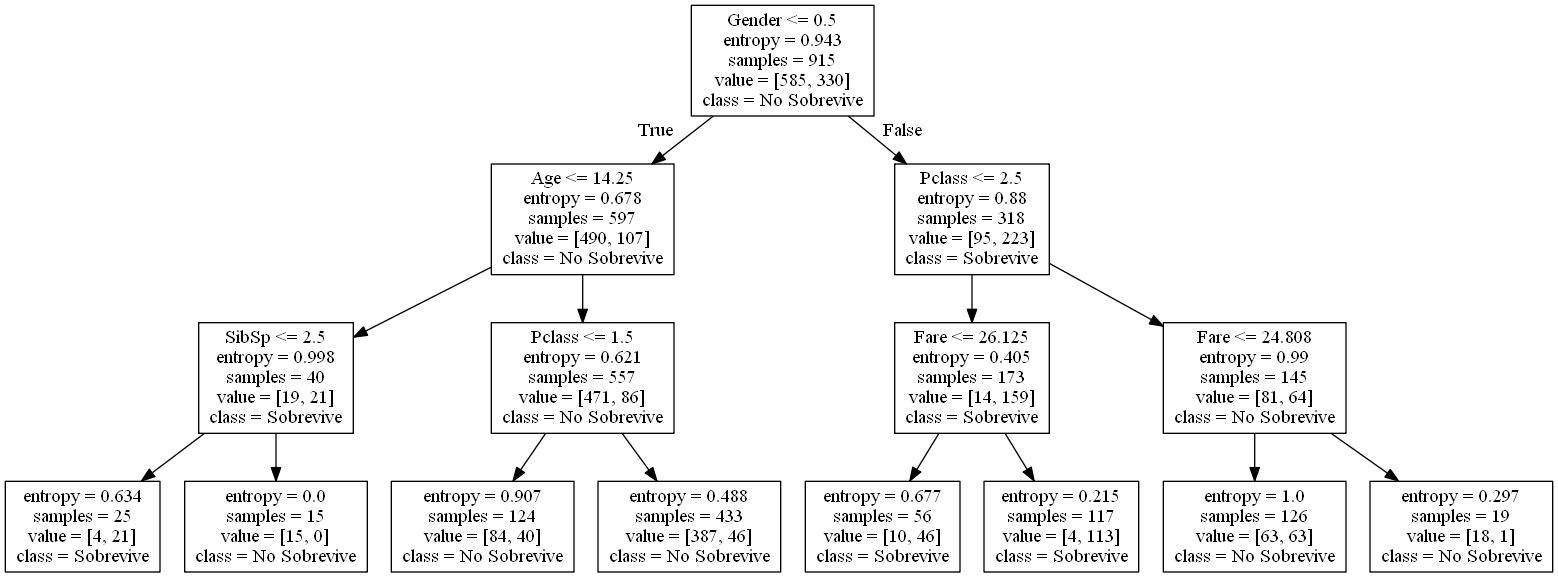

In [17]:
from IPython.display import Image

#display the decison tree graphic
Image("titanic.png")

¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

La mayor de cantidad de victimas fatales tenian una cantidad baja de tarifa abonada por ticket  por eso era considerada
la edad influia tambien los menores  para aser enfacis en su edad

### Parte 2: Aplicar el modelo del árbol de decisiones

In [18]:
testing = pd.read_csv("titanic-test.csv")
testing

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
5,921,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
6,922,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
7,923,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
8,924,0,3,"Foley, Mr. William",male,NaN,0,0,365235,7.7500,NaN,Q
9,925,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S


¿Cuántos registros hay en el conjunto de datos?

**Respuesta:** 393

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta:** ninguna  se tiene todo

In [19]:
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [20]:
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [21]:
testing.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.00000,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.00000,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.00000,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.00000,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
5,921,0,3,"Abbott, Mr. Rossmore Edward",0,16.00000,1,1,C.A. 2673,20.2500,NaN,S
6,922,0,3,"Karlsson, Mr. Nils August",0,22.00000,0,0,350060,7.5208,NaN,S
7,923,0,3,"Connaghton, Mr. Michael",0,31.00000,0,0,335097,7.7500,NaN,Q
8,924,0,3,"Foley, Mr. William",0,29.56569,0,0,365235,7.7500,NaN,Q
9,925,0,2,"Leyson, Mr. Robert William Norman",0,24.00000,0,0,C.A. 29566,10.5000,NaN,S


In [22]:
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

### CONTESTAR

In [23]:
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

In [24]:
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [25]:
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
acc

0.7588832487309645

In [26]:
all_data.head()

,Passenger,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


### Parte 3: Evaluar el modelo del árbol de decisiones

In [27]:
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


¿Cuántos registros hay en el conjunto de datos?

**Respuesta:** 1308

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta:** ninguna no son nesesarias para evalvuar el arbol

In [28]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [29]:
all_data["Age"].fillna(training["Age"].mean(), inplace=True)
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [30]:
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [31]:
type(X_train)

numpy.ndarray

In [32]:
X_train

array([[ 8.05      ,  3.        ,  1.        , 18.        ,  0.        ],
       [76.7292    ,  1.        ,  0.        , 48.        ,  1.        ],
       [35.        ,  1.        ,  0.        , 29.97086721,  0.        ],
       ...,
       [ 7.7333    ,  3.        ,  1.        , 29.97086721,  0.        ],
       [36.75      ,  2.        ,  1.        , 20.        ,  0.        ],
       [15.5       ,  3.        ,  1.        , 32.        ,  1.        ]])

In [33]:
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [34]:
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


### Hacer de Tarea

Elimina  valores de edad faltantes

use un  promedio para reemplazar los valores de edad faltantes puede afectar la precisión del modelo. la solución para esto puede fue  eliminar todas las observaciones con valores de edad faltantes.

In [35]:
training = pd.read_csv("titanic-train.csv")
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [36]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [37]:
training.dropna(subset=['Age'], inplace=True)

In [38]:
training

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.0,0,0,211535,13.0000,NaN,S
6,7,0,3,"Bowen, Mr. David John ""Dai""",0,21.0,0,0,54636,16.1000,NaN,S
7,8,0,3,"Assam, Mr. Ali",0,23.0,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
11,12,0,2,"Maybery, Mr. Frank Hubert",0,40.0,0,0,239059,16.0000,NaN,S
12,13,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,63.3583,D10 D12,C
13,14,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,S


In [39]:
y_target = training["Survived"].values

In [40]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [41]:
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [42]:
clf_train.score(X_input,y_target)

0.8252032520325203

In [45]:
clasificacion=['No vive', 'vive']

In [46]:
import sklearn
#from sklearn.externals.six import StringIO
with open("titanic2.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [47]:
!dot -Tpng titanic2.dot -o titanic2.png

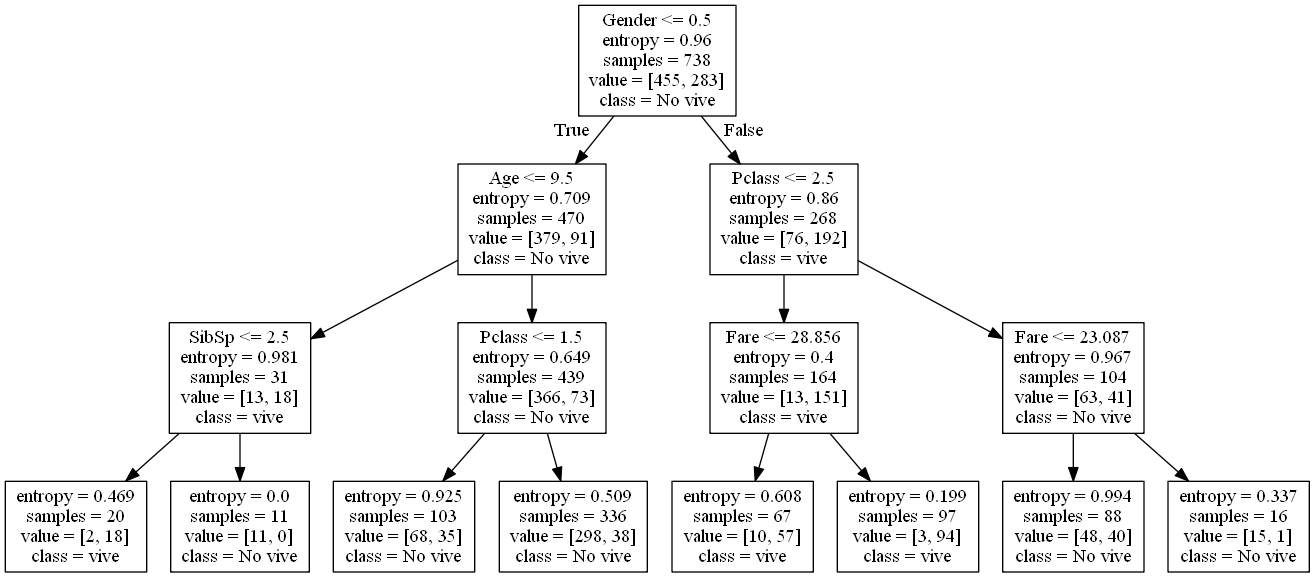

In [48]:
from IPython.display import Image

#display the decison tree graphic
Image("titanic2.png")

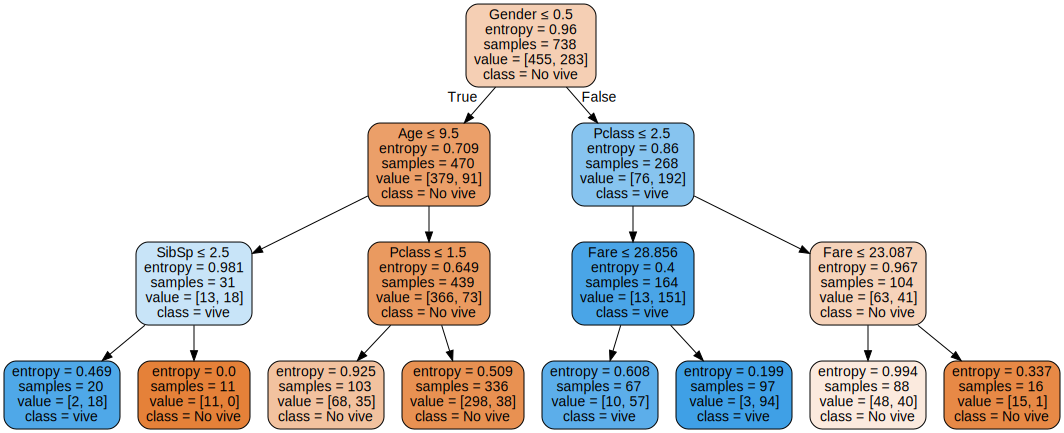

In [49]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=clasificacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("TitanicColor", format='png')
graph

##### Conclucion.

 Que hay datos mas rapidos  que se pueden usar mejor, usando un reguimen de lo que se quiere saber asi aroje datos mas esactos de ciertas caracteriticas como lo que desaba saber aqui.
 